In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel('data.xlsx')
data['datatime'] = pd.to_datetime(data['datatime'])
data = data.replace('[-11059] No Good Data For Calculation',np.NaN)
data = data.replace(0,np.NaN)
data = data.drop_duplicates()
data = data[data.Y.notna()]

data.head()

,datatime,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
0,2019-01-01 07:00:00,851.3,13992.829540,280.748261,NaN,NaN,390.014061,34.641964,0.590507,1.334964,...,173.592126,1880.250775,64934.226796,1997.009659,46.058654,34.107018,4.122300,38.266313,369.910731,370.940167
1,2019-02-01 07:00:00,851.7,13214.682745,287.760227,NaN,NaN,389.976684,29.417244,3.039666,1.261034,...,173.474671,1900.988241,64887.815539,1990.852706,46.216459,34.941665,4.113665,39.091541,369.402941,371.119521
3,2019-03-01 07:00:00,852.4,13031.126273,287.446907,NaN,NaN,389.960257,23.281082,2.986076,1.269644,...,173.516566,1894.297256,65080.555143,1981.679355,46.388590,34.852216,4.111253,38.996565,369.191242,371.213372
4,2019-04-01 07:00:00,852.8,13599.110247,276.926470,NaN,NaN,389.995702,22.760785,3.119679,1.255986,...,173.526882,1913.514736,64998.802233,1997.338611,47.227642,35.533084,4.134403,39.680946,368.975814,371.347260
5,2019-05-01 07:00:00,853.6,14572.851117,280.206066,NaN,NaN,390.017539,21.944358,3.280952,1.244139,...,173.542369,1891.781221,65480.683332,1997.104199,47.306886,35.603969,4.122994,39.755838,369.024071,371.615504


In [3]:
data.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
count,318.000000,318.000000,318.000000,76.000000,76.000000,318.000000,318.000000,318.000000,318.000000,318.000000,...,318.000000,318.000000,318.000000,317.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,853.550943,13930.002159,290.846158,395.468902,395.468919,392.025548,20.387305,3.087421,1.151301,1.415633,...,161.970948,1883.767252,64930.091579,2031.667265,46.978166,35.612333,4.076428,39.700194,359.899225,367.857062
std,3.122562,2850.456627,38.164068,1.317630,1.317472,2.793939,6.370219,1.350828,0.091834,0.109018,...,20.719455,137.289889,4777.717331,132.445179,1.725744,0.923684,0.550999,1.146956,19.777580,39.296354
min,841.600000,7172.993595,109.103997,394.944918,394.944918,389.521649,0.017042,0.005442,0.855805,1.034075,...,62.665204,1152.508125,41603.816481,1891.726414,40.469243,32.593453,2.127352,36.509801,324.438671,185.748905
25%,852.300000,12074.327180,277.512751,394.989721,394.989721,389.995103,17.012111,2.339861,1.106634,1.351416,...,164.925898,1864.264778,64158.417134,1997.117132,46.724757,35.130999,3.959621,39.143344,337.985754,351.208568
50%,853.800000,13388.340952,301.947949,395.005476,395.005476,390.016966,19.818898,2.936261,1.160793,1.427335,...,168.995436,1893.317647,65240.339535,2001.489623,47.160788,35.650337,4.113269,39.596996,369.865088,372.914009
75%,855.500000,16091.072749,316.964491,395.031569,395.031569,394.993291,22.825344,3.808302,1.210242,1.492909,...,169.998027,1927.356320,66405.726789,2007.275757,47.531896,35.885311,4.532342,39.915395,373.208121,375.959881
max,861.500000,20931.040988,330.052630,400.080335,400.080335,400.103138,61.658717,7.072721,1.345533,1.635771,...,173.592126,2201.681050,76046.822880,2894.436757,50.523222,37.640208,5.022212,42.530915,387.904173,989.380101


### Пропуски

Имеем высокий процент пропусков в признаках Х3 и Х4 (их в анализ не берем). Отсутствующие значения в признаках Х25, X30 и Х26 можно заполнить импьютерами. 

In [4]:
nuls = data.isnull().mean().to_frame().sort_values(by=0, ascending = False)
nuls = nuls.reset_index()
nuls.columns = ['feature','%_nulls']
nuls['%_fulls'] = nuls['%_nulls'].apply(lambda x: 1 - x)
nuls.head(10)

,feature,%_nulls,%_fulls
0,X3,0.761006,0.238994
1,X4,0.761006,0.238994
2,X25,0.213836,0.786164
3,X30,0.003145,0.996855
4,X26,0.003145,0.996855
5,datatime,0.000000,1.000000
6,X27,0.000000,1.000000
7,X21,0.000000,1.000000
8,X22,0.000000,1.000000
9,X23,0.000000,1.000000


In [5]:
nan_cols = list(nuls[nuls['%_fulls']<1].feature)
cols_to_drop = list(nuls[nuls['%_fulls']<0.8].feature)
cols_to_impute = set(nan_cols)-set(cols_to_drop)-set('Y')

if cols_to_drop:
    for col in cols_to_drop:
        data = data.drop(col, axis=1)

### Заполнение пропусков

Рассмотрим признаки ближе

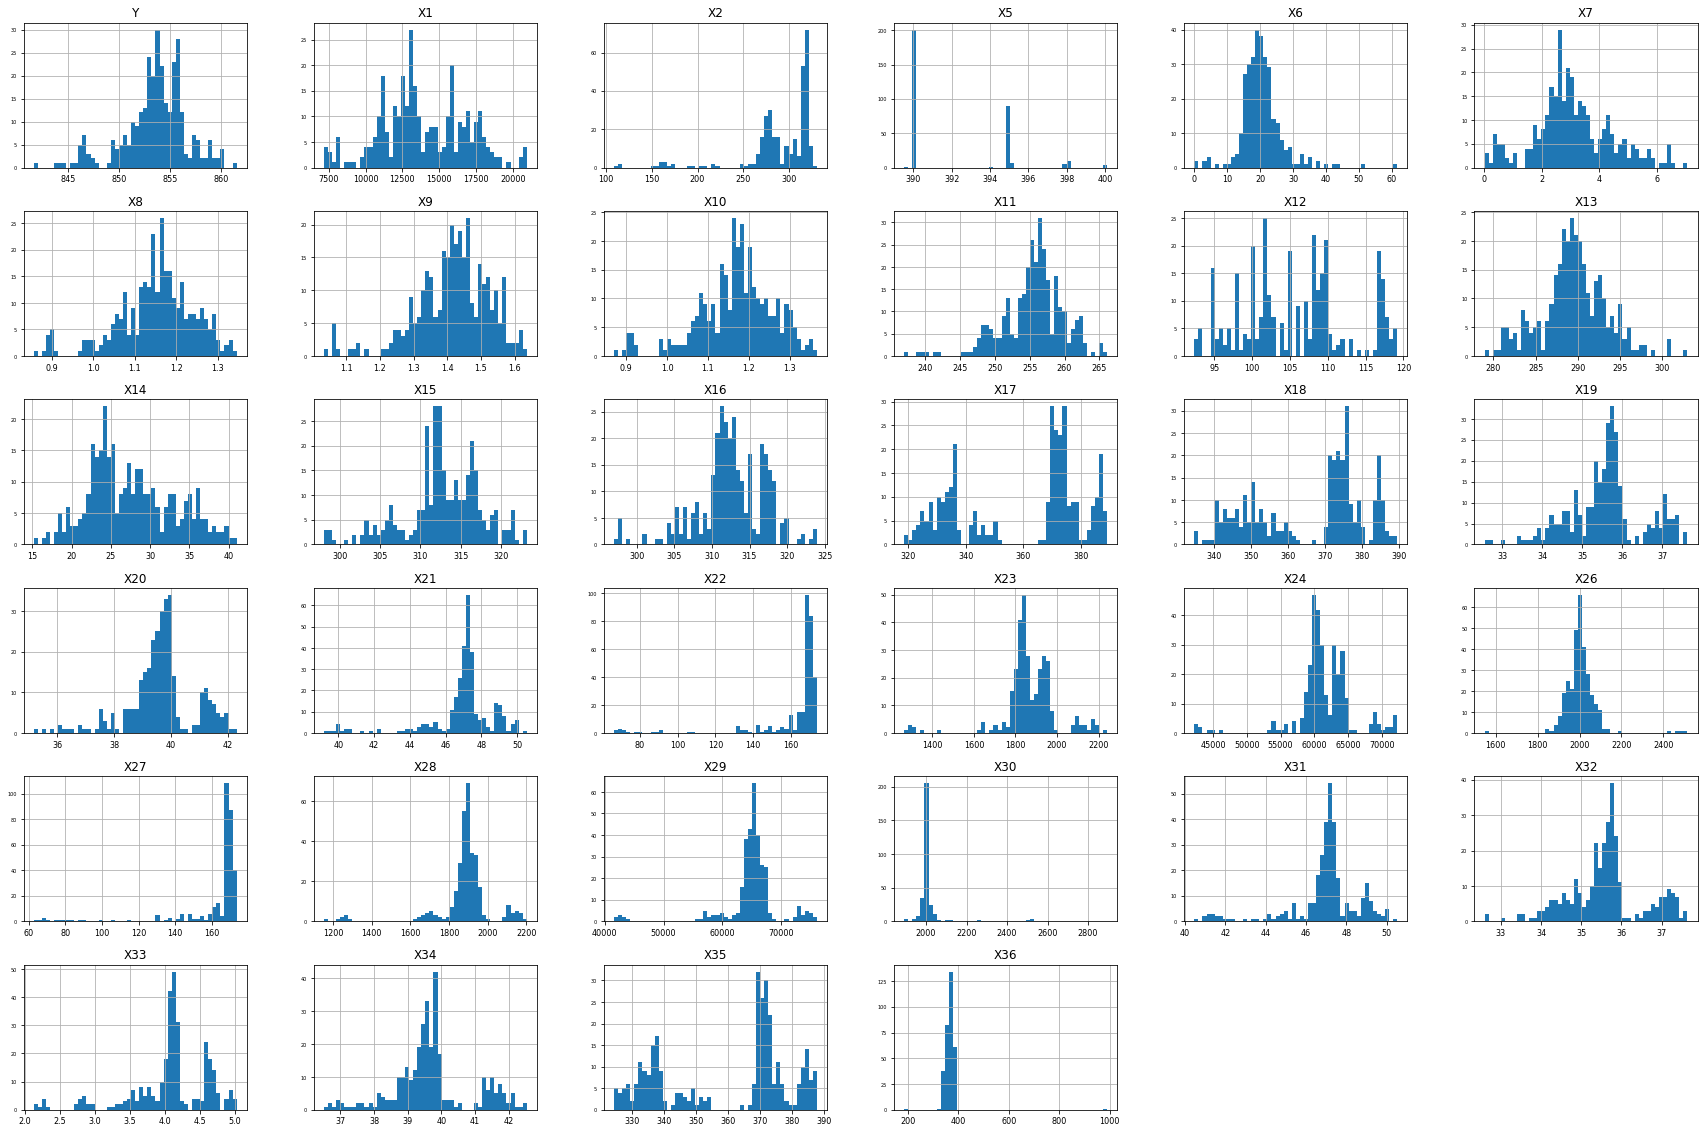

In [6]:
features = data.select_dtypes(exclude=['datetime']).columns.tolist()
data[features].hist(figsize=(30, 20), bins=50, xlabelsize=8, ylabelsize=5);

In [7]:
from sklearn.impute import KNNImputer

def knn_impute(df, col):
    imputer = KNNImputer(n_neighbors=5)
    imp_col = imputer.fit_transform(df[col].to_numpy().reshape(-1, 1))
    imp_col = [item[0] for item in imp_col.tolist()]
    df[col] = imp_col
    return df

#Стратегия knn 
for col in cols_to_impute:
    knn_impute(data, col)

### Корреляции признаков

Из матрицы видим наличие корреляций, например признаки:
- Х8 с Х9, Х10; 
- Х17 с Х18, Х35; 
- Х19 с Х32; 
- Х21 с Х31; 
- Х22 и Х27; 
- Х23 и Х24; 
- Х28 и Х29; 

Это также хорошо видно из распределений признаков. 

<AxesSubplot:>

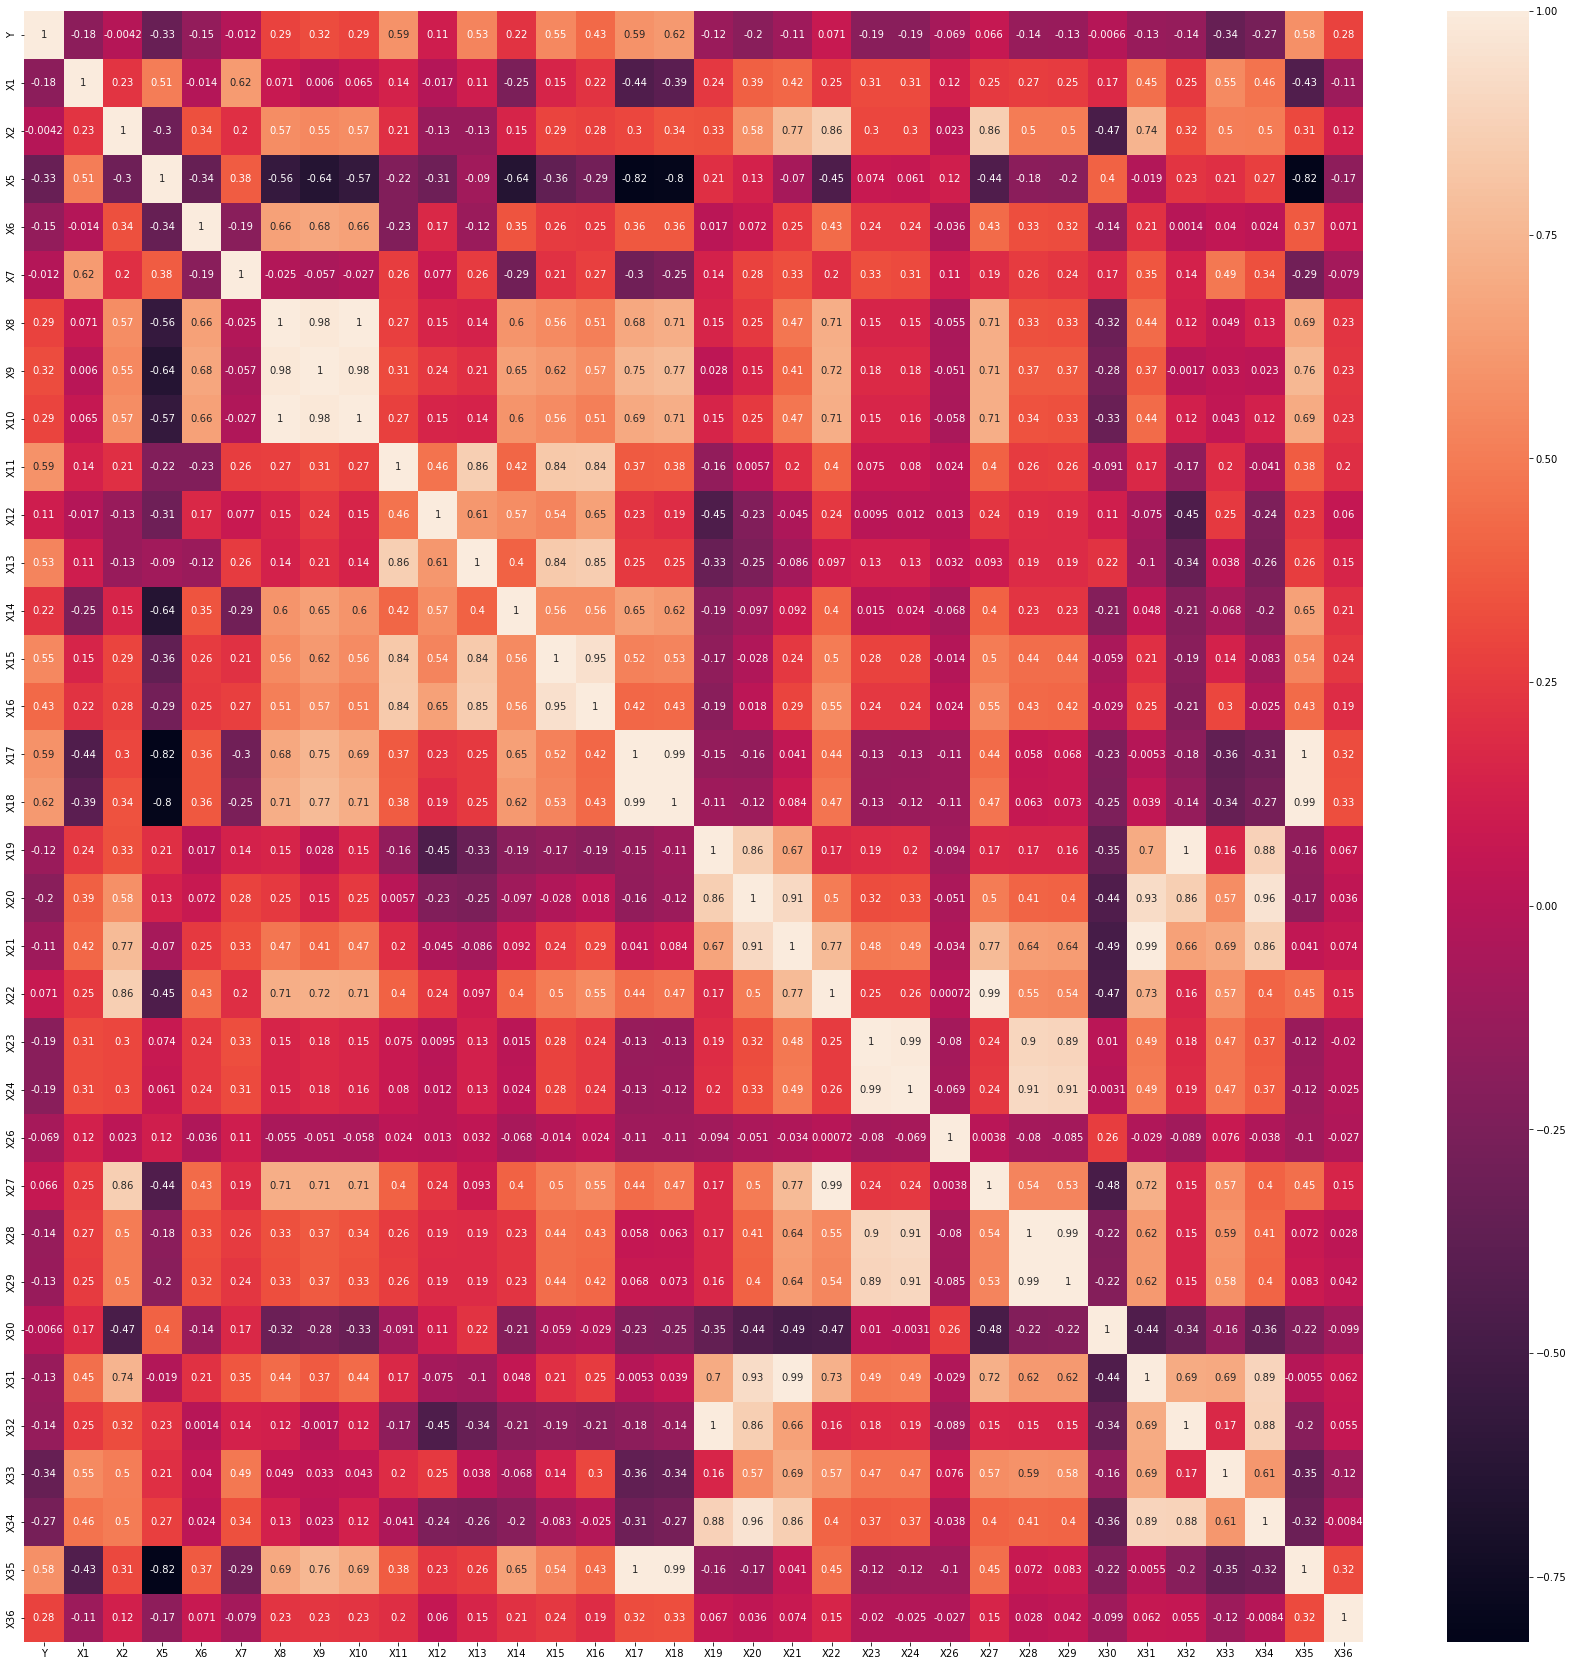

In [8]:
corr_matrix = data.loc[:,features].corr(method='pearson', min_periods=50)
plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix, annot=True)

In [9]:
corr_matrix.head()

,Y,X1,X2,X5,X6,X7,X8,X9,X10,X11,...,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36
Y,1.000000,-0.179189,-0.004174,-0.331360,-0.148189,-0.011554,0.287107,0.317136,0.292686,0.587396,...,0.065713,-0.136307,-0.128057,-0.006604,-0.125626,-0.143503,-0.340771,-0.273680,0.584879,0.284915
X1,-0.179189,1.000000,0.225570,0.508323,-0.013835,0.623851,0.071022,0.006019,0.064902,0.138150,...,0.249033,0.266276,0.254994,0.174558,0.447144,0.251740,0.553146,0.461098,-0.431546,-0.114881
X2,-0.004174,0.225570,1.000000,-0.303402,0.337594,0.202705,0.570484,0.548867,0.571796,0.207492,...,0.857733,0.497956,0.498744,-0.467386,0.742445,0.318745,0.502597,0.499084,0.307906,0.118772
X5,-0.331360,0.508323,-0.303402,1.000000,-0.342319,0.375426,-0.560059,-0.639236,-0.566928,-0.224908,...,-0.442626,-0.183873,-0.195138,0.397963,-0.019375,0.229847,0.207908,0.273560,-0.822564,-0.170622
X6,-0.148189,-0.013835,0.337594,-0.342319,1.000000,-0.189008,0.656599,0.678462,0.655296,-0.226767,...,0.431026,0.325671,0.318967,-0.135014,0.210055,0.001353,0.040097,0.024296,0.367818,0.070739


In [10]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("Признаки для удаления на основе корреляции:",to_drop)

Признаки для удаления на основе корреляции: ['X9', 'X10', 'X18', 'X24', 'X27', 'X29', 'X31', 'X32', 'X34', 'X35']


In [11]:
data.drop(to_drop, axis=1, inplace=True)

### Предобработка и Отбор значимых признаков

In [48]:
from sklearn import preprocessing

# data.drop('datatime', axis=1, inplace=True)

features = [col for col in data.columns if col!='Y']
target = ['Y']

x = data[features].values 
y = data[target].values

min_max_scaler_x = preprocessing.MinMaxScaler()
min_max_scaler_y = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler_x.fit_transform(x)
y_scaled = min_max_scaler_y.fit_transform(y)

data_scaled = pd.DataFrame(x_scaled, columns=features)
data_scaled.insert (loc= 0 , column='Y', value=y_scaled)

In [49]:
data_scaled.head()

,Y,X1,X2,X5,X6,X7,X8,X11,X12,X13,...,X19,X20,X21,X22,X23,X26,X28,X30,X33,X36
0,0.487437,0.495698,0.776851,0.046535,0.561713,0.082785,0.978418,0.585697,0.881078,0.429460,...,0.302871,0.452658,0.607635,1.000000,0.558144,0.458899,0.693635,0.104999,0.689134,0.230443
1,0.507538,0.439139,0.808587,0.043003,0.476953,0.429334,0.827458,0.685783,0.922155,0.543846,...,0.468687,0.541671,0.622378,0.999026,0.575082,0.465060,0.713400,0.098858,0.686152,0.230666
2,0.542714,0.425797,0.807169,0.041450,0.377408,0.421751,0.845038,0.779220,0.918146,0.602327,...,0.450769,0.544537,0.637940,0.999287,0.570856,0.481115,0.707023,0.089710,0.685319,0.230783
3,0.562814,0.467081,0.759554,0.044800,0.368967,0.440656,0.817150,0.764558,0.916421,0.589760,...,0.585131,0.643779,0.711509,0.999420,0.572361,0.482674,0.725340,0.105327,0.693315,0.230950
4,0.603015,0.537857,0.774398,0.046864,0.355722,0.463475,0.792959,0.743878,0.921479,0.569980,...,0.598927,0.648810,0.719221,0.999291,0.583258,0.423746,0.704625,0.105093,0.689374,0.231283


Выбор оптимального количества признаков для модели регрессии может быть выполнен с использованием метода SelectKBest из библиотеки scikit-learn. Этот метод позволяет выбрать k наиболее важных признаков на основе заданной метрики оценки (F-статистики).

In [14]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, SGDRegressor

X = data_scaled.loc[:, features]
Y = data_scaled.loc[:, target]

estimator = LinearRegression()
selector = SelectKBest(score_func=f_regression)
selector.fit(X, Y)

k_best_indices = selector.get_support(indices=True)
k_best_features = [features[i] for i in k_best_indices]

# Вывод результатов
print("Оптимальное количество признаков:", len(k_best_indices))
print("Отобранные признаки:", k_best_features)

Оптимальное количество признаков: 10
Отобранные признаки: ['X5', 'X8', 'X11', 'X13', 'X14', 'X15', 'X16', 'X17', 'X33', 'X36']


### Выбор модели

Рассмотрим три модели:
- Линейную регрессию
- Случайный лес
- XGBoost

In [15]:
# !pip install xgboost 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

In [16]:
X = X[k_best_features]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=51)

In [17]:
lr_model = LinearRegression().fit(x_train, y_train)
print("R_2:",lr_model.score(x_train,y_train))

R_2: 0.7115041636318995


In [88]:
# param_grid = {'n_estimators': range(100,700,100), 'max_features':['sqrt','log2'],'max_depth':[5,6,7,8] }
# rf = RandomForestRegressor(criterion ='friedman_mse')
# clf = GridSearchCV(rf, param_grid, scoring='r2')

# rf_model = clf.fit(x_train, y_train)
# rf_model = clf.best_estimator_

# print('R_2:',clf.best_score_)

R_2: 0.7439489558156376


In [18]:
#Финальная модель Случайного леса с параметрами
rf_model = RandomForestRegressor(criterion ='friedman_mse', max_depth=7, n_estimators=500, max_features='sqrt')
rf_model = rf_model.fit(x_train, y_train)

In [92]:
# param_grid = {
#         'min_child_weight': [0.5, 1, 1.5, 2],
#         'gamma': [0.5, 1, 1.5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [6,7,8],
#         'n_estimators': range(100,700,100),
#         }

# xgb = XGBRegressor(learning_rate=0.1,
#                    objective='reg:squarederror',
#                    nthread=1)

# clf = GridSearchCV(xgb, param_grid, scoring='r2')
# xgb_model = clf.fit(x_train, y_train)
# xgb_model = clf.best_estimator_
# print('R_2:', clf.best_score_)

R_2: 0.4341874325275958


In [19]:
#Финальная модель Бустинга с параметрами
xgb_model = XGBRegressor(learning_rate=0.1,
                   max_depth=6,
                   n_estimators=600,
                   objective='reg:squarederror',
                   min_child_weight=0.5,
                   gamma=0.5,
                   subsample=0.8,
                   colsample_bytree=1,
                   nthread=1)
xgb_model = xgb_model.fit(x_train, y_train)

### Оценка моделей

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate(model,X_train,X_test,y_train,y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    return pd.DataFrame({'MAE train':[mae_train],
                         'MAE test':[mae_test],
                         'MSE train':[mse_train],
                         'MSE test':[mse_test],
                         'R2 train': [r2_train],
                         'R2 test': [r2_test]})

In [55]:
evaluate(lr_model,x_train,x_test,y_train,y_test)

,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,0.063457,0.068526,0.006753,0.008864,0.711504,0.672222


In [56]:
evaluate(rf_model,x_train,x_test,y_train,y_test)

,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,0.026394,0.056066,0.001269,0.006956,0.945793,0.742776


In [31]:
evaluate(xgb_model,x_train,x_test,y_train,y_test)

,MAE train,MAE test,MSE train,MSE test,R2 train,R2 test
0,0.078695,0.09055,0.011194,0.016538,0.521789,0.388409


Самый высокий порядок ошибки у бустинговой модели. Ожидаемо, ошибка на тестовом сете данных выше, чем на обучающем на всех моделях. Значение R2 метрики сильно падает в случае случайного леса и бустинга - переобучение на этих моделях значительно сильнее, чем на линейной регрессии. 

График ошибок в зависимости от размера выборки

In [24]:
from sklearn.metrics import mean_squared_error

def plot_errors(model, X, Y):
    
    if model==lr_model:
        model_name = 'Linear regression'
    elif model==rf_model:
        model_name = 'Random Forest'
    else:
        model_name = 'XGBoost'
    
    train_errors = []
    test_errors = []
    train_sizes = np.linspace(0.10, 0.80, 50)

    for train_size in train_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=float(train_size), random_state=42)
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        train_errors.append(train_error)
        test_errors.append(test_error)

    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Testing Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve '+model_name)
    plt.legend()
    plt.show()

График среднеквадратичных ошибок в зависимости от размера выборки позволит наглядно увидеть изменение ошибки на обучающей и тестовой выборках.
Если модель переобучена, мы можем наблюдать сильное расхождение между ошибками на обучающей и тестовой выборках.
Мы перебираем разные размеры обучающей выборки с помощью train_sizes и для каждого размера обучающей выборки обучаем модель и вычисляем ошибку на обучающей и тестовой выборках с помощью среднеквадратической ошибки (mean_squared_error). 

Самые низкие значения ошибок демонстрирует Случайный Лес, ошибки XGBoost на порядок выше. Все модели демонстрируют близкие значения ошибок на обучающей и тестовой выборках.

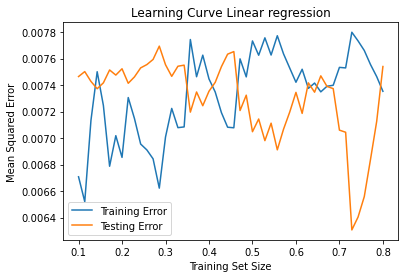

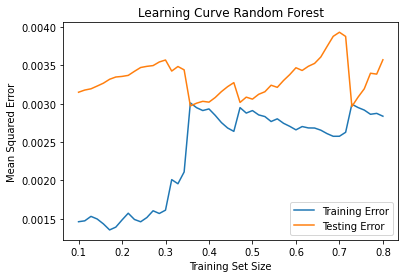

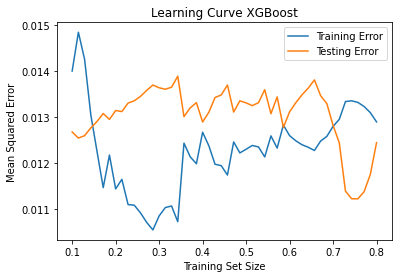

In [25]:
X = X[k_best_features]
models = [lr_model, rf_model, xgb_model]
for model in models:
    plot_errors(model, X,Y)

### Важные признаки

Рассмотрим две модели в контексте оценки важности признаков: Линейную регрессию и Случайный лес. Бустинг не берем в силу высоких ошибок. 

### Линейная регрессия

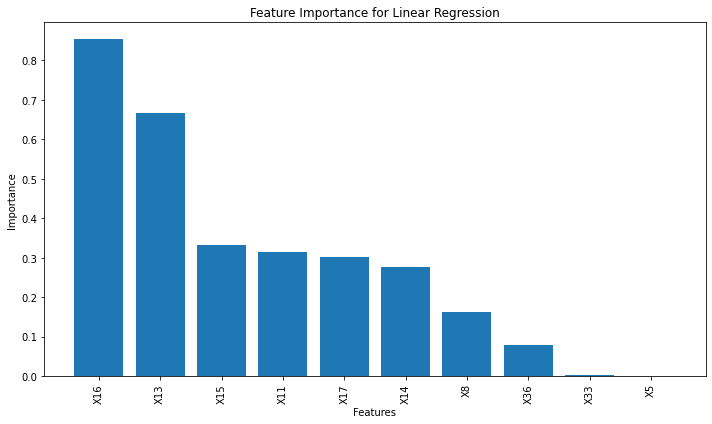

In [26]:
feature_importances = np.abs(lr_model.coef_)
sorted_indices = np.argsort(feature_importances[0])[::-1]
sorted_feature_importances = feature_importances[0][sorted_indices]
sorted_feature_names = [k_best_features[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances[0])), sorted_feature_importances)
plt.xticks(range(len(feature_importances[0])), sorted_feature_names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance for Linear Regression")
plt.tight_layout()
plt.show()

### Случайный лес

Т.к. случайный лес не имеет весов или коэффициентов, воспользуемся библиотекой SHAP для интерпретации важности признаков. 

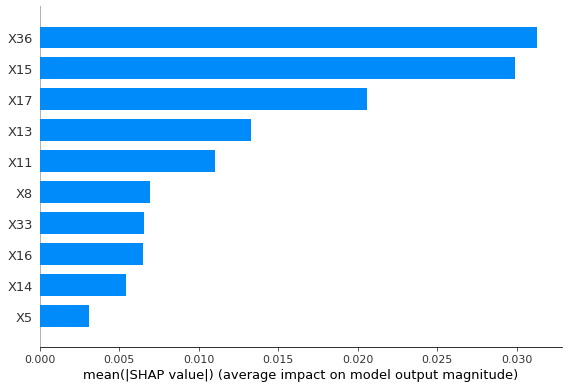

In [27]:
# !pip install shap
import shap

explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

Далее будем работать с обученной моделью Линейной регрессии.

In [86]:
import pickle
with open ('model.pkl','wb') as file:
    pickle.dump(lr_model,file)
    
with open ('scaler_y.pkl','wb') as file:
    pickle.dump(min_max_scaler_y,file)

with open ('scaler_x.pkl','wb') as file:
    pickle.dump(scaler_x,file)
